In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('../input/videogamesales/vgsales.csv')
data.drop(['Rank'], axis=1, inplace=True)
data['Year'] = data['Year'].fillna(2009.0)

# Which game has highest Global Sales? ----> Wii Sports

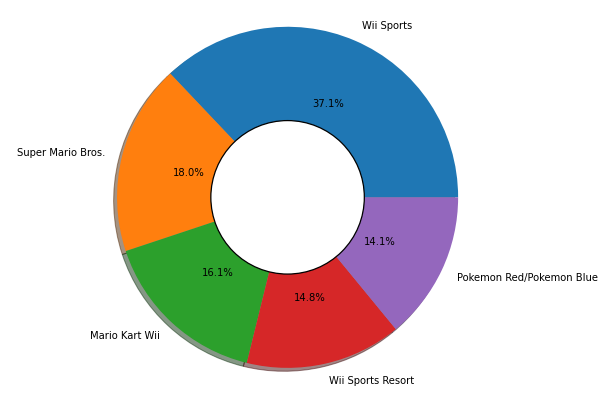

In [2]:
game = data.loc[:,['Name','Global_Sales']]
game = game.sort_values('Global_Sales', ascending=False)
game = game.head()

fig = plt.figure(figsize=(10,7))
plt.pie(game['Global_Sales'], labels=game['Name'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

# Top 5 platforms per year

In [3]:
top_5_platforms = ['DS', 'PS2', 'PS3', 'Wii', 'X360']
perc = data.loc[:,["Year","Platform",'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Platform,perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
#perc = perc[perc['year'].astype('float')>=2000.0]
perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Platform'].isin(top_5_platforms)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Platform', y="total_sales", animation_frame="Year", 
           animation_group="Platform", color="Platform", hover_name="Platform")
fig.show()

# Which years saw highest game launches?  ----> 2007-2010

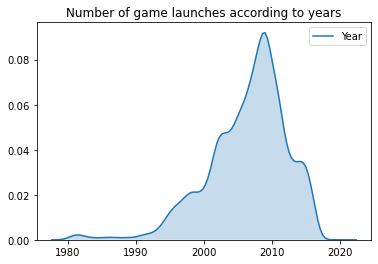

In [4]:
sns.kdeplot(data=data['Year'], label='Year', shade=True)
plt.title('Number of game launches according to years')
plt.show()

# Relation of Global_sales with year ---> One outlier noticed

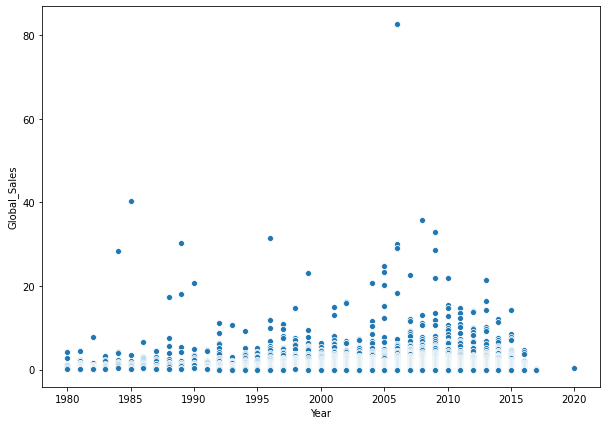

In [5]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='Year', y='Global_Sales')
plt.show()

# Which genre of games have highest sales?

In [6]:
genre = data.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()